<a href="https://colab.research.google.com/github/DKVkrk/CODSOFT/blob/main/da_pro1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn seaborn matplotlib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [ ]:
# Check for missing values in each column
print(df.isnull().sum())


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# Display column names and data types
print(df.info())

# Check statistical summary of numerical columns
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:

df.drop(columns=['StandardHours', 'Over18', 'EmployeeCount'], inplace=True)



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns  # Get column names with text data
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['Attrition', 'EmployeeNumber'])  # Drop Attrition & EmployeeNumber from features
y = df['Attrition']  # Target variable

employee_numbers = df['EmployeeNumber']
X_train, X_test, y_train, y_test, emp_train, emp_test= train_test_split(
    X, y, employee_numbers, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Make predictions on test data
y_pred = model.predict(X_test)


In [ ]:
print(X_test.index)



Index([1041,  184, 1222,   67,  220,  494,  430,  240,  218,   49,
       ...
        316, 1458, 1070,  682,  394,  567,  560,  945,  522,  651],
      dtype='int64', length=294)


In [ ]:
import pandas as pd

# Create a DataFrame to compare actual vs. predicted attrition
comparison_df = pd.DataFrame({
    'EmployeeNumber': emp_test,  # Now we use actual EmployeeNumbers
    'Actual_Attrition': y_test.values,  # Convert y_test to values for alignment
    'Predicted_Attrition': y_pred  # Predictions from the model
})

# Show first 10 results
print(comparison_df.head(10))



      EmployeeNumber  Actual_Attrition  Predicted_Attrition
1041            1469                 0                    0
184              250                 0                    0
1222            1714                 1                    0
67                86                 0                    0
220              304                 0                    0
494              666                 0                    0
430              577                 0                    0
240              332                 0                    0
218              302                 0                    0
49                63                 0                    0


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy result
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.87


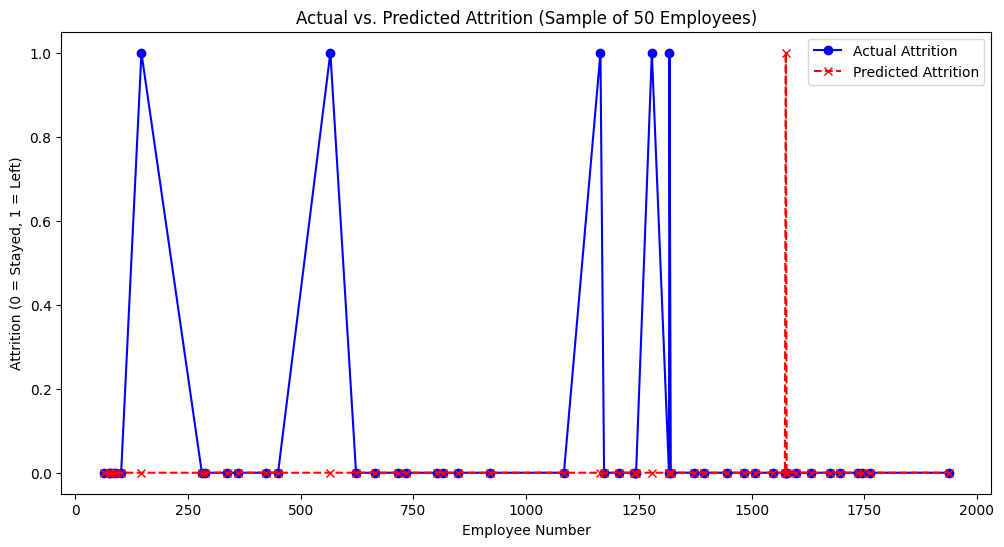

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select a subset of employees for better visualization
sample_df = comparison_df.sample(n=50, random_state=42)

# Sort by Employee Number for better readability
sample_df = sample_df.sort_values(by="EmployeeNumber")

plt.figure(figsize=(12, 6))

# Plot actual attrition
plt.plot(sample_df['EmployeeNumber'], sample_df['Actual_Attrition'], label='Actual Attrition', marker='o', linestyle='-', color='blue')

# Plot predicted attrition
plt.plot(sample_df['EmployeeNumber'], sample_df['Predicted_Attrition'], label='Predicted Attrition', marker='x', linestyle='--', color='red')

# Labels & Title
plt.xlabel("Employee Number")
plt.ylabel("Attrition (0 = Stayed, 1 = Left)")
plt.title("Actual vs. Predicted Attrition (Sample of 50 Employees)")
plt.legend()

In [ ]:
file_path = "/content/WA_Fn-UseC_-HR-Employee-Attrition.csv"  # Replace with your actual file name
df = pd.read_csv(file_path)

# Display first few rows to check structure
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [ ]:
import pandas as pd


df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")


df.drop(columns=['StandardHours', 'Over18', 'EmployeeCount'], inplace=True)


categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col in label_encoders:
        df[col] = label_encoders[col].transform(df[col])
X_full = df[X_train.columns]

# Predict attrition for all employees
df['Predicted_Attrition'] = model.predict(X_full)

# Save the updated dataset with predictions
df.to_csv("/content/Updated_Attrition_Predictions.csv", index=False)

print("Updated CSV file saved successfully as 'Updated_Attrition_Predictions.csv'")




Updated CSV file saved successfully as 'Updated_Attrition_Predictions.csv'


In [ ]:
# Prediction of Salary

In [ ]:

df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")


print(df.head())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [ ]:

features = ['JobRole', 'TotalWorkingYears', 'Education', 'PerformanceRating', 'StockOptionLevel']
target = 'MonthlyIncome'


df = df.dropna(subset=[target])


In [ ]:

# One-Hot Encode categorical columns
df_encoded = pd.get_dummies(df[features], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
df_encoded[['TotalWorkingYears', 'Education', 'PerformanceRating', 'StockOptionLevel']] = scaler.fit_transform(
    df_encoded[['TotalWorkingYears', 'Education', 'PerformanceRating', 'StockOptionLevel']]
)

# Define X (features) and y (target variable)
X = df_encoded
y = df[target]



In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)


In [ ]:
# Function to print evaluation metrics
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"📊 {model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("-" * 40)

# Evaluate both models
evaluate_model(y_test, y_pred_lr, "Linear Regression")



📊 Linear Regression Performance:
Mean Absolute Error (MAE): 1332.49
Mean Squared Error (MSE): 2852327.42
Root Mean Squared Error (RMSE): 1688.88
R² Score: 0.87
----------------------------------------


In [ ]:
# Predict salary for all employees
df['Predicted_Salary'] = lr_model.predict(X)

# Save the updated dataset with predictions
df.to_csv("/content/Updated_Employee_Data_with_Predicted_Salary.csv", index=False)

print("✅ Predicted salary column added and saved to CSV successfully!")



✅ Predicted salary column added and saved to CSV successfully!


In [ ]:
#Employee Performance

df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")


print(df.head())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Convert categorical columns to numeric
df = pd.get_dummies(df, drop_first=True)


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "WA_Fn-UseC_-HR-Employee-Attrition.csv"  # Update this with the actual path
df = pd.read_csv(file_path)

# Drop irrelevant columns
drop_cols = ["EmployeeNumber", "EmployeeCount", "Over18", "StandardHours"]
df = df.drop(columns=drop_cols, errors='ignore')

# Convert categorical columns to numeric
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target variable (y)
X = df.drop(["PerformanceRating"], axis=1)  # Exclude target column
y = df["PerformanceRating"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions on test data
y_pred = model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Predict performance for the entire dataset
X_scaled = scaler.transform(X)
df["PredictedPerformance"] = model.predict(X_scaled)

# Save updated dataset with predictions
updated_file_path = "Updated_Employee_Performance.csv"
df.to_csv(updated_file_path, index=False)
print(f"Updated dataset saved as {updated_file_path}")



Accuracy: 1.0
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       251
           4       1.00      1.00      1.00        43

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294

Updated dataset saved as Updated_Employee_Performance.csv
